# Contrails emission model training


In [1]:
!pip install autogluon --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.4/382.4 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.2/181.2 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 8.8 MB/s eta 0:00:

In [4]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing  and cleaning data

In [6]:
df = pd.read_csv("data_challenge.csv")
df.head()

,Aircraft,Engine,Role,Registration,Seats,Cargo Capacity (t),Flight Number,Date,Take-off Time (UTC),Origin Airport,Destination Airport,Distance OD (km),Distance Flown (km),CO2 (kgCO2e),Contrails (kgCO2e)
0,A20N,PW1127G-JM,PAX,EC-NFH,186.0,0.0,VY7835,2023-06-15,2023-06-15 16:01:00.000,EGKK,LEBL,1109.053917,1155.727519,11253.969499,0.000000
1,A20N,PW1127G-JM,PAX,EC-NIJ,186.0,0.0,VY7830,2023-06-15,2023-06-15 05:12:20.000000000,LEBL,EGKK,1109.053917,1255.367953,11965.946434,16370.295266
2,A20N,PW1127G-JM,PAX,EC-NCT,186.0,0.0,VY3212,2023-12-31,2023-12-31 10:52:17.000,LEBL,GCXO,2194.502853,NaN,19808.910939,NaN
3,A20N,PW1127G-JM,PAX,EC-NCF,186.0,0.0,VY6213,2023-10-09,2023-10-09 15:49:00.403000000,LEMG,LIRF,1548.024410,1590.238353,14352.387644,41217.801880
4,A321,CFM56-5B3/3,PAX,EC-NLY,220.0,0.0,VY8748,2023-11-02,2023-11-02 13:50:32.000000000,EGCC,LEBL,1379.156221,1492.741633,20147.168918,11686.423628


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Aircraft             20000 non-null  object 
 1   Engine               20000 non-null  object 
 2   Role                 19864 non-null  object 
 3   Registration         20000 non-null  object 
 4   Seats                20000 non-null  float64
 5   Cargo Capacity (t)   20000 non-null  float64
 6   Flight Number        20000 non-null  object 
 7   Date                 20000 non-null  object 
 8   Take-off Time (UTC)  20000 non-null  object 
 9   Origin Airport       20000 non-null  object 
 10  Destination Airport  20000 non-null  object 
 11  Distance OD (km)     19999 non-null  float64
 12  Distance Flown (km)  19329 non-null  float64
 13  CO2 (kgCO2e)         19999 non-null  float64
 14  Contrails (kgCO2e)   19329 non-null  float64
dtypes: float64(6), object(9)
memory usag

In [5]:
df.describe()

,Seats,Cargo Capacity (t),Distance OD (km),Distance Flown (km),CO2 (kgCO2e),Contrails (kgCO2e)
count,20000.000000,20000.0,19999.000000,19329.000000,19999.000000,1.932900e+04
mean,187.536900,0.0,1025.202147,1107.439713,13506.174725,1.530646e+04
std,17.773506,0.0,591.114218,587.208986,5926.465763,9.875629e+04
min,144.000000,0.0,0.000000,160.159369,0.000000,-7.379588e+05
25%,180.000000,0.0,645.678281,738.323894,9663.835380,0.000000e+00
50%,186.000000,0.0,887.676503,986.958248,12480.392837,0.000000e+00
75%,186.000000,0.0,1369.687977,1445.475404,16727.825927,0.000000e+00
max,230.000000,0.0,3849.304846,6272.527576,64373.012688,3.302312e+06


It can be noticed that:
- There is no cargo flight
- Some Distance/contrails value are missing
- Contrails can be negative (when contrails reflect solar radiation)

As a consequence, Role and Cargo Capacity columns are removed and **we assume that the model only works for passenger trafic**


In [7]:

df_clean=df.drop(columns=["Role","Cargo Capacity (t)"])
df_clean.dropna(inplace=True)
df_clean.describe()


,Seats,Distance OD (km),Distance Flown (km),CO2 (kgCO2e),Contrails (kgCO2e)
count,19329.000000,19329.000000,19329.000000,19329.000000,1.932900e+04
mean,187.510890,1011.294948,1107.439713,13373.867767,1.530646e+04
std,17.731761,569.220408,587.208986,5691.775198,9.875629e+04
min,144.000000,0.000000,160.159369,3355.384738,-7.379588e+05
25%,180.000000,637.446826,738.323894,9631.504789,0.000000e+00
50%,186.000000,883.252270,986.958248,12445.860861,0.000000e+00
75%,186.000000,1358.028873,1445.475404,16572.432033,0.000000e+00
max,230.000000,3849.304846,6272.527576,64373.012688,3.302312e+06


## Feature Engineering

Preparing relevant data for the model

Half-unique variable are non relevant for the model as same as the OD distance compared to the flown one (a 0km flight may have contrails emission). According to this they are  removed.




In [8]:
from sklearn.preprocessing import LabelEncoder

def preprocess_df(df, label_encoders=None, training=True):
    df = df.copy()

    # Drop non relevant columns
    df.drop(columns=["Flight Number", "Registration", "Distance OD (km)"], inplace=True, errors='ignore')

    # Parsing Dates
    df["Date"] = pd.to_datetime(df["Date"], errors='coerce')
    df["Month"] = df["Date"].dt.month
    df["Day"] = df["Date"].dt.day
    df["Weekday"] = df["Date"].dt.weekday

    df["Take-off Time (UTC)"] = pd.to_datetime(df["Take-off Time (UTC)"], errors='coerce')
    df["Takeoff_Hour"] = df["Take-off Time (UTC)"].dt.hour

    df.drop(columns=["Date", "Take-off Time (UTC)"], inplace=True, errors='ignore')

    # Encoding categorical variables
    categorical_cols = ["Aircraft", "Engine", "Origin Airport", "Destination Airport"]
    encoders = {} if training else label_encoders

    for col in categorical_cols:
        df[col] = df[col].astype(str)
        if training:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            encoders[col] = le
        else:
            le = label_encoders[col]
            df[col] = le.transform(df[col])

    return df, encoders


In [ ]:
import joblib
# Preprocessing data
df_model, label_encoders = preprocess_df(df_clean, training=True)

# Saving encoders & features without target
target_col = "Contrails (kgCO2e)"
X = df_model.drop(columns=[target_col])
joblib.dump(X.columns.tolist(), "model_features.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")



['model_features.pkl']

### Data visualization

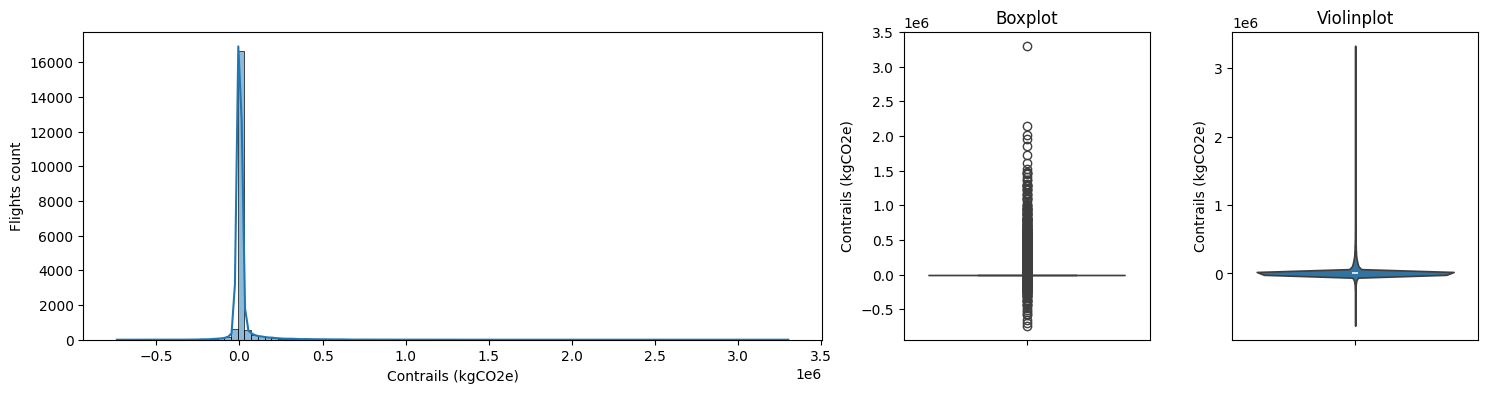

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4), gridspec_kw={'width_ratios': [3, 1, 1]})

# Histogram
sns.histplot(df_model["Contrails (kgCO2e)"], bins=100, kde=True, ax=axes[0])
axes[0].set_xlabel("Contrails (kgCO2e)")
axes[0].set_ylabel("Flights count")

# Boxplot
sns.boxplot(y=df_model["Contrails (kgCO2e)"], ax=axes[1])
axes[1].set_title("Boxplot")

# Violinplot
sns.violinplot(y=df_model["Contrails (kgCO2e)"], ax=axes[2])
axes[2].set_title("Violinplot")

plt.show()


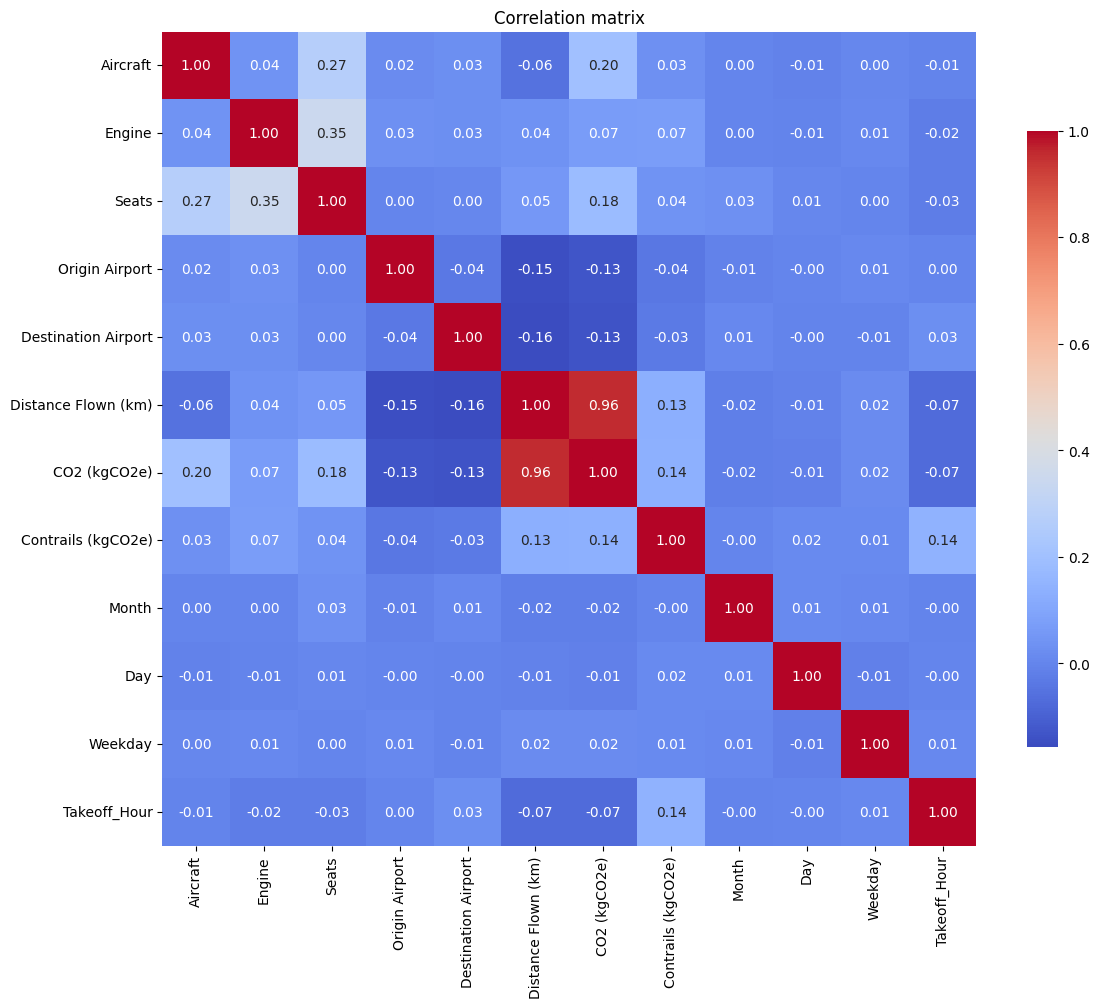

In [10]:
correlation_matrix=df_model.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.75})
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

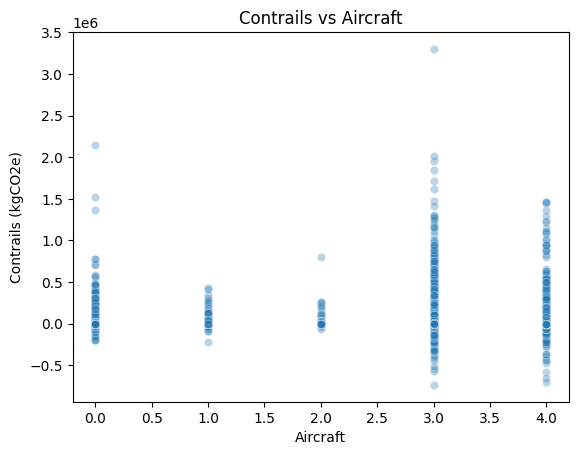

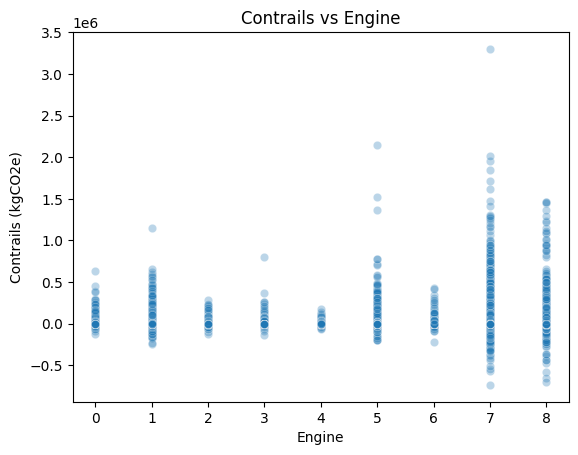

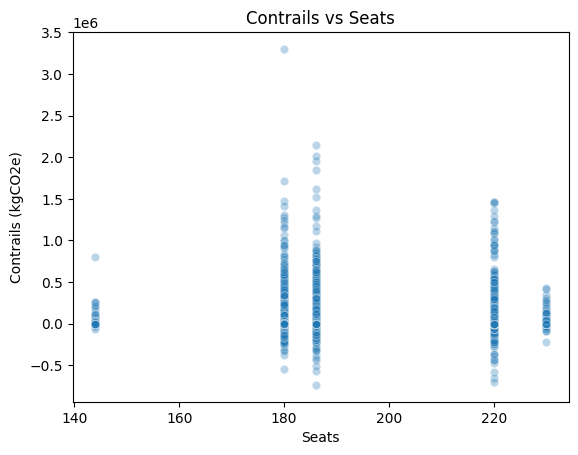

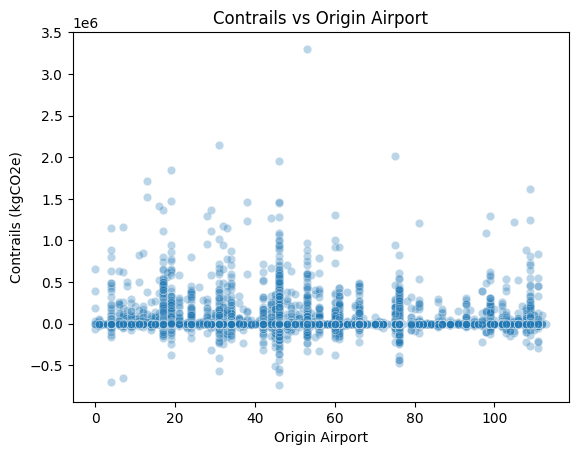

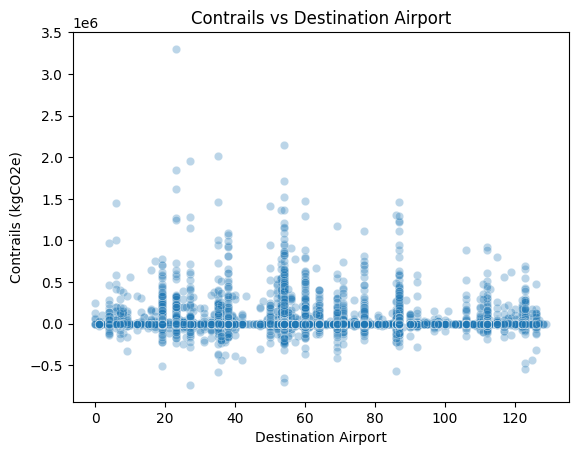

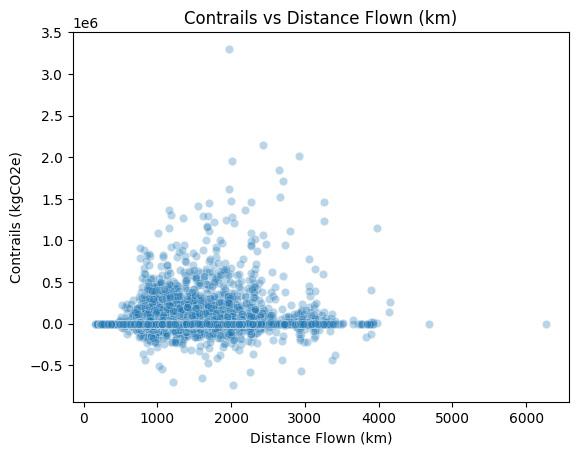

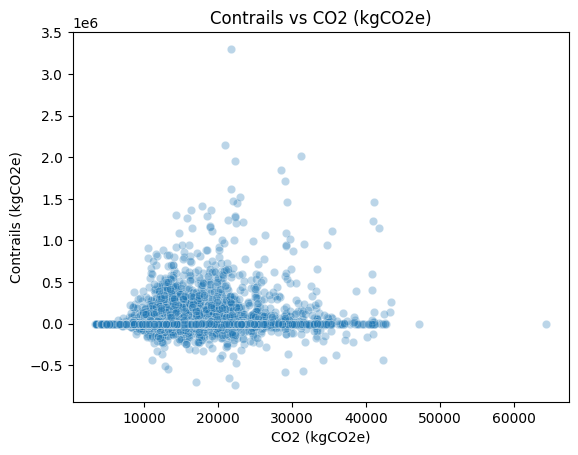

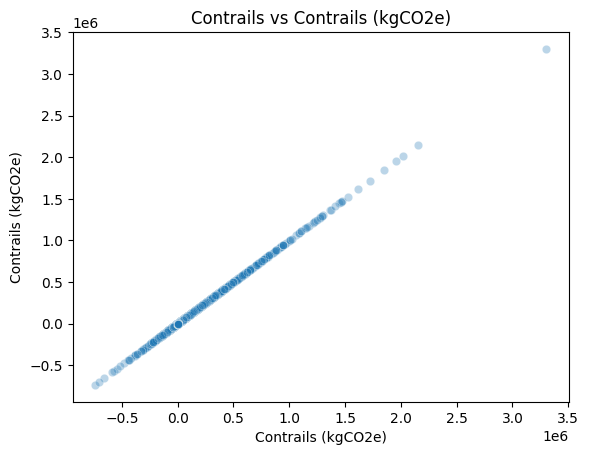

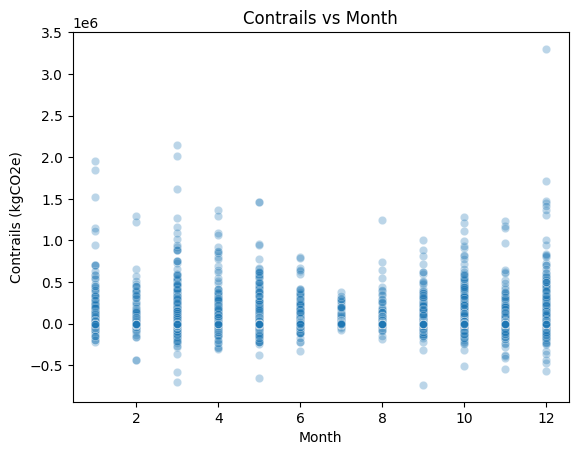

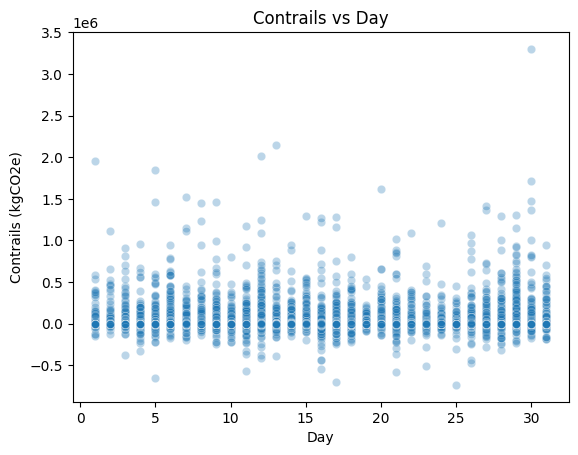

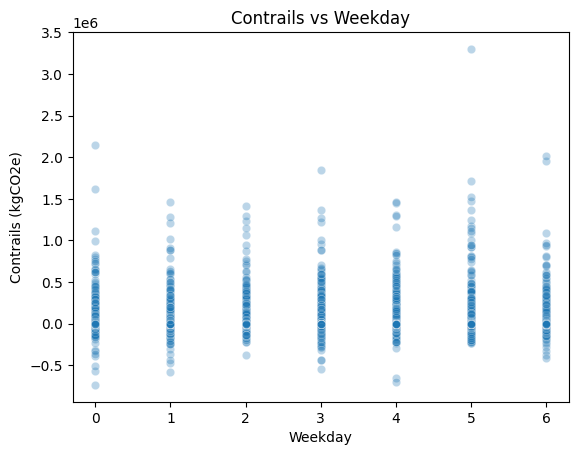

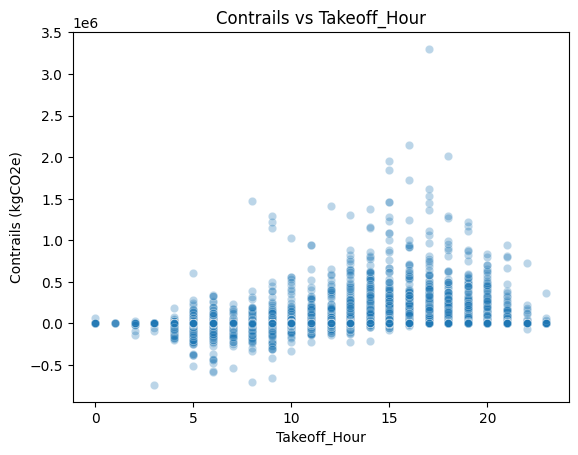

In [11]:
target = "Contrails (kgCO2e)"
numeric_cols = df_model.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure()
    sns.scatterplot(data=df_model, x=col, y=target, alpha=0.3)
    plt.title(f"Contrails vs {col}")
    plt.show()


It can be seen that there is **no clear linear relation** between contrails emissions and the other variables so the non-linear **XGBoost** model is choosen.

However by parsing time data, it can be noticed that depending on the month, contrails emission may vary according to the season -- there are less emission during summer when the air is supposed to be dry. It can also be seen a little dependencie on the takeoff hour, it will be interesting to check later if those parameters have enough importance for the model.

## Training of the XGBoost Model

Isolating the target

In [12]:
y = df_model["Contrails (kgCO2e)"]
X = df_model.drop(columns=["Contrails (kgCO2e)"])

Separation between train and test sets

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
import xgboost as xgb

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=50,
    random_state=42
)
model.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
          verbose=True)

model.save_model("xgboost_contrails_model.json")


[0]	validation_0-rmse:95394.79480
[1]	validation_0-rmse:94376.18038
[2]	validation_0-rmse:94007.17661
[3]	validation_0-rmse:93613.05657
[4]	validation_0-rmse:93603.64735
[5]	validation_0-rmse:93029.00428
[6]	validation_0-rmse:92613.61881
[7]	validation_0-rmse:92491.91045
[8]	validation_0-rmse:92549.52239
[9]	validation_0-rmse:92632.23320
[10]	validation_0-rmse:92351.82240
[11]	validation_0-rmse:92356.37724
[12]	validation_0-rmse:92126.41953
[13]	validation_0-rmse:92097.19012
[14]	validation_0-rmse:91985.35550
[15]	validation_0-rmse:91932.99951
[16]	validation_0-rmse:91992.65612
[17]	validation_0-rmse:92146.87279
[18]	validation_0-rmse:91452.55287
[19]	validation_0-rmse:91500.16965
[20]	validation_0-rmse:91508.85790
[21]	validation_0-rmse:91390.18059
[22]	validation_0-rmse:91542.85454
[23]	validation_0-rmse:91956.38441
[24]	validation_0-rmse:92076.58662
[25]	validation_0-rmse:92142.15040
[26]	validation_0-rmse:92407.81963
[27]	validation_0-rmse:92089.10520
[28]	validation_0-rmse:92285.7

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


RMSE: 93919.95
R²: 0.08


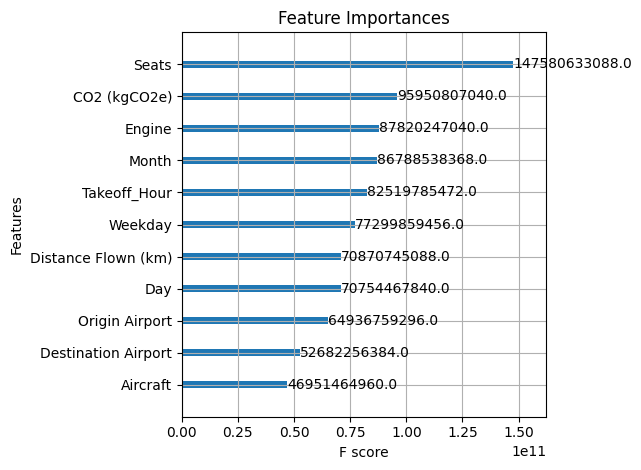

In [16]:
xgb.plot_importance(model, max_num_features=20, importance_type="gain")
plt.title("Feature Importances")
plt.tight_layout()
plt.show()

The XGBoost model itself does not seem efficient enough to predict contrails emission even if it can be seen that "Month" and "Takeoff_Hour" parameters have enough importance. Facing this problem, another option is to combine severous model with **Autogluon**.

## Training with Autogluon

In [17]:
from autogluon.tabular import TabularPredictor
target_label="Contrails (kgCO2e)"

In [19]:
# Create the dataframe
df_autogluon = df_model.copy()


# Split and removing the initial non-log target
train_df, test_df = train_test_split(df_autogluon, test_size=0.2, random_state=22)


In [20]:

predictor = TabularPredictor(label=target_label, problem_type="regression").fit(
    train_data=train_df,
    time_limit=300,
    presets="best_quality"
)


No path specified. Models will be saved in: "AutogluonModels/ag-20250516_164108"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.0
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       11.12 GB / 12.67 GB (87.7%)
Disk Space Avail:   65.47 GB / 107.72 GB (60.8%)
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be

(_ray_fit pid=13775) [1000]	valid_set's rmse: 96215


(_dystack pid=13218) 	-90025.4103	 = Validation score   (-root_mean_squared_error)
(_dystack pid=13218) 	52.0s	 = Training   runtime
(_dystack pid=13218) 	1.13s	 = Validation runtime
(_dystack pid=13218) Fitting model: WeightedEnsemble_L2 ... Training model for up to 68.21s of the 4.89s of remaining time.
(_dystack pid=13218) 	Ensemble Weights: {'LightGBMXT_BAG_L1': 0.96, 'KNeighborsUnif_BAG_L1': 0.04}
(_dystack pid=13218) 	-90015.4876	 = Validation score   (-root_mean_squared_error)
(_dystack pid=13218) 	0.02s	 = Training   runtime
(_dystack pid=13218) 	0.0s	 = Validation runtime
(_dystack pid=13218) Fitting 106 L2 models, fit_strategy="sequential" ...
(_dystack pid=13218) Fitting model: LightGBMXT_BAG_L2 ... Training model for up to 4.86s of the 4.84s of remaining time.
(_dystack pid=13218) 	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy (2 workers, per: cpus=1, gpus=0, memory=0.13%)
(_ray_fit pid=13915) 	Ran out of time, early stopping on iterat

In [21]:
predictor.leaderboard(silent=True)


,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-89293.350534,root_mean_squared_error,1.414184,82.584079,0.000818,0.024578,2,True,6
1,WeightedEnsemble_L3,-89293.350534,root_mean_squared_error,1.414464,82.603917,0.001098,0.044416,3,True,8
2,LightGBM_BAG_L1,-89776.484196,root_mean_squared_error,0.324963,37.334533,0.324963,37.334533,1,True,4
3,LightGBMXT_BAG_L1,-89810.220087,root_mean_squared_error,1.088402,45.224968,1.088402,45.224968,1,True,3
4,LightGBMXT_BAG_L2,-90431.430558,root_mean_squared_error,2.760050,157.585904,0.113833,38.354290,2,True,7
5,RandomForestMSE_BAG_L1,-94140.089496,root_mean_squared_error,0.964782,36.559450,0.964782,36.559450,1,True,5
6,KNeighborsUnif_BAG_L1,-103939.612954,root_mean_squared_error,0.128804,0.058292,0.128804,0.058292,1,True,1
7,KNeighborsDist_BAG_L1,-105138.307041,root_mean_squared_error,0.139266,0.054373,0.139266,0.054373,1,True,2


In [22]:
predictor.evaluate(test_df)

{'root_mean_squared_error': np.float64(-97985.6127308995),
 'mean_squared_error': -9601180302.249815,
 'mean_absolute_error': -29802.229454871835,
 'r2': 0.16043662908418743,
 'pearsonr': 0.4153004658842352,
 'median_absolute_error': np.float64(-6965.267363082416)}

## Model Comparison: AutoGluon vs XGBoost

There is no clear winner between AutoGluon and XGBoost in terms of overall performance. While some evaluation metrics favor AutoGluon, others favor XGBoost.

To better understand how each model behaves, we now examine the distribution of the predicted values as a function of the true contrail impact.


In [23]:
y_true = test_df[target_label]

# Autogluon prediction
y_pred=predictor.predict(test_df.drop(columns=[target_label]))
#Xgboost prediction
y_pred_xgb=model.predict(test_df.drop(columns=[target_label]))


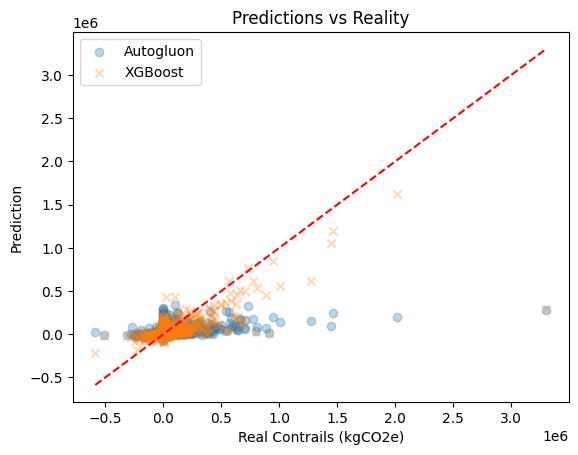

In [24]:
plt.figure()
plt.scatter(y_true, y_pred, alpha=0.3, label="Autogluon")
plt.scatter(y_true, y_pred_xgb, alpha=0.3, marker='x', label="XGBoost")
plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
plt.xlabel("Real Contrails (kgCO2e)")
plt.ylabel("Prediction")
plt.title("Predictions vs Reality")
plt.legend()
plt.show()

As the objective is not only overall accuracy but also to detect rare but significant events, we prioritize a model that errs on the side of overestimation rather than completely missing these events.
Therefore, **XGBoost is selected** as the final model for inference, as it aligns more closely with the physical and strategic priorities of the task.